

# Project: Investigate a Dataset (no show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
trying to understand what are the reasons for abcences, here are some 
questions we should answer through the investigation :
-Is there a relationship between gender and attendence of the appointments? 
-Is sending message SMS affects on the attendance?
-Is there a relationship between Age and attendence to the appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Here we will clean the dataset in order to apply operations on it**

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
ApointmentsData = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
ApointmentsData.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No




### Data Cleaning (searching for null or duplicated values)

In [3]:
# Now we are checking for any null values, unwanted duplicated values and others to clean dataframe completly
# checking for null values, the output is 0 which indicates no null values.
ApointmentsData.isnull().any(axis=1).sum()


0

In [4]:
# let us check for unwanted duplication values, this will give 0 which is also indicates that no duplicated values found.
ApointmentsData.duplicated().sum()

0

In [5]:
# taking a general look at the dataframe, we found that the minimum value of the coulmn age is -1,
ApointmentsData.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# There are planty of ways to fix this, here we are going to replace zero and negative values whith the mean value of Age.
MeanOfAge = ApointmentsData['Age'].mean()
ApointmentsData[ApointmentsData['Age'] <= 0] = MeanOfAge


In [7]:
# notice that ScheduledDay and AppointmentDay are stored as objects where they should be stored in datetime fromat     
# to change that we do the following 
ApointmentsData['ScheduledDay'] = pd.to_datetime(ApointmentsData['ScheduledDay'])
ApointmentsData['AppointmentDay'] = pd.to_datetime(ApointmentsData['AppointmentDay'])
ApointmentsData.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null float64
Hipertension      110527 non-null float64
Diabetes          110527 non-null float64
Alcoholism        110527 non-null float64
Handcap           110527 non-null float64
SMS_received      110527 non-null float64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(9), object(3)
memory usage: 11.8+ MB


In [8]:
# to make it more practical to work with, let us change the values of Yes and No.
ApointmentsData['No-show'][ApointmentsData['No-show'] == 'Yes'] = '0'
ApointmentsData['No-show'][ApointmentsData['No-show'] == 'No'] = '1'
ApointmentsData['No-show'] = pd.to_numeric(ApointmentsData['No-show'])
ApointmentsData.head(10)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,9.598513e+13,5626772.0,F,2016-04-27 08:36:51,2016-04-29,76.0,REPÚBLICA,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,7.336882e+14,5630279.0,F,2016-04-27 15:05:12,2016-04-29,23.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.449833e+12,5630575.0,F,2016-04-27 15:39:58,2016-04-29,39.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5.639473e+13,5638447.0,F,2016-04-29 08:02:16,2016-04-29,21.0,ANDORINHAS,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,7.812456e+13,5629123.0,F,2016-04-27 12:48:25,2016-04-29,19.0,CONQUISTA,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
print('Showed: ',ApointmentsData['No-show'][ApointmentsData['No-show'] == 0].count())
print('Not-showed: ',ApointmentsData['No-show'][ApointmentsData['No-show'] == 1].count())


Showed:  21680
Not-showed:  85307


In [10]:
# now lets split No-Show coulmn into two coulmns indicating Showd and Not-showed patient
ApointmentsData['Showed'] = ApointmentsData['No-show'] == 1
ApointmentsData['Not_showed'] = ApointmentsData['No-show'] == 0
ApointmentsData.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Showed,Not_showed
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1.0,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1.0,True,False
5,9.598513e+13,5626772.0,F,2016-04-27 08:36:51,2016-04-29,76.0,REPÚBLICA,0.0,1.0,0.0,0.0,0.0,0.0,1.0,True,False
6,7.336882e+14,5630279.0,F,2016-04-27 15:05:12,2016-04-29,23.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
7,3.449833e+12,5630575.0,F,2016-04-27 15:39:58,2016-04-29,39.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
8,5.639473e+13,5638447.0,F,2016-04-29 08:02:16,2016-04-29,21.0,ANDORINHAS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False
9,7.812456e+13,5629123.0,F,2016-04-27 12:48:25,2016-04-29,19.0,CONQUISTA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False


In [11]:

Showed = ApointmentsData['Showed']
Not_Showed = ApointmentsData['Not_showed']

<a id='eda'></a>
## Exploratory Data Analysis

> **Answering Provided Questions**

### Research Question 1 (Is there a relationship between gender and attendence of the appointments?)

Gender
37.08887421173107     3540
F                    70118
M                    36869
Name: Showed, dtype: int64


Text(0.5, 1.0, 'Relation between Gender and patients who showed')

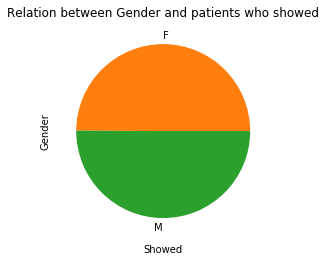

In [74]:
# now we are discussing whether there is a relationship bwtween Gender and Attendance of the appointments 
# as we see from the mean value, the number of males attendance is slightly more than females attendance which means
# there is no strong relationship between Gender and attendance of the appointments. 
# this can be seen more clearly in figure below
print(ApointmentsData.groupby('Gender')['Showed'].count())
ApointmentsData.groupby('Gender')['Showed'].mean().plot(kind='pie');
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("Relation between Gender and patients who showed")

### Research Question 2 (Does sending messages increases the chance of attending appointments?)

SMS_received
0.000000     72402
1.000000     34585
37.088874     3540
Name: Showed, dtype: int64


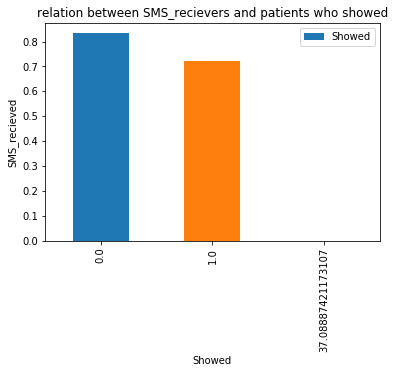

In [109]:
# Does sending messages increases the chance of attending appointments? by looking to the mean value we can see that
# those who receieve messages are more than those who didn't receive in terms of attending appointments
# as given below by mean value and the figure.
print(ApointmentsData.groupby('SMS_received')['Showed'].count())
ApointmentsData.groupby('SMS_received')['Showed'].mean().plot(kind='bar');
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend()

### Research Question 3  (Is there a relationship between Age and attendence to the appointment? )

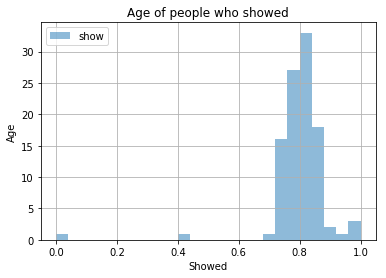

In [43]:
# Here we are checking if Age of the patients affects the posibility of attending appointments, as we can see from 
# the figure below Age plays the most important factor considering attendance of appointments where the older person is the 
# higher chance of attending appointments.

ApointmentsData.groupby('Age')['Showed'].mean().hist(alpha=0.5,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()


### Research Question 4  (Is there a relationship between Gender and Scholarship? raising the chance of attendending appointments? )

Scholarship  Gender           
0.000000     F                    61292
             M                    34886
1.000000     F                     8826
             M                     1983
37.088874    37.08887421173107     3540
Name: Showed, dtype: int64


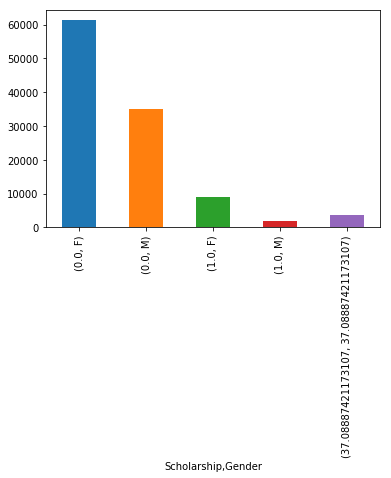

In [128]:
# As we see below the number of females with scholarship are more than male in terms of attending appointments 

ApointmentsData.groupby(['Scholarship', 'Gender']).Showed.count().plot(kind='bar');
print(ApointmentsData.groupby(['Scholarship', 'Gender']).Showed.count());

<a id='Limitation'></a>
## Limitation
> There are couple of features missing which can help analyzing this dataset better such as if the patient is employeed or not , or whether the patient have a series medical issue or not. Another issue is there were some illogical data such as patients with age 0 or less.

<a id='conclusions'></a>
## Conclusions

> After digging into the dataset and investegating it we conclude that: Males attends appointments more than females, however this is not a strong factor, also those who recived sms messages have higher chance of attending appointments compared with those who didn't receive, finally Age is the strongest afecting factor, while the older the person is the higher chance of attending appointments.